# Customer Churn Prediction (Telco)

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Problem statement
* In the highly competitive telecommunications industry, customers have a wide range of providers to choose from and can easily switch to a competitor. This results in a high annual churn rate, which can be expensive for companies. Customer retention is far more cost-effective than customer acquisition. 
* The problem: Without a robust method for predicting which customers are at high risk of leaving, the company cannot take proactive, targeted actions to retain them. 

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- The data consists of 21 column and 7044 rows.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [99]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [100]:
df = pd.read_csv('../data/processed/train.csv')

In [101]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


Displaying first 5 rows of the training dataset for refrencing purpose 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


1) From the given information regarding the dataset we can infer that majority of the columns are of object data type.
2) while only three columns namely [SeniorCitizen , tenure, MonthlyCharges ] represents numerical datatypes {int,float}.

In [103]:
df.drop(columns=["customerID"],inplace=True)

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5634.0,0.163294,0.369667,0.0,0.0000,0.0,0.0,1.00
tenure,5634.0,32.485091,24.568744,0.0,9.0000,29.0,55.0,72.00
MonthlyCharges,5634.0,64.929961,30.138105,18.4,35.6625,70.5,90.0,118.75


#### Shape of the Training Dataset

In [105]:
df.shape

(5634, 20)

#### Checking null values

In [106]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### No Null Values are present in this Data

### Checking Duplicate Values

In [107]:
df.duplicated().sum()

np.int64(15)

##### No Duplicate Values present in this Dataset 

### Checking the number of unique values of each column

In [108]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1489
TotalCharges        5276
Churn                  2
dtype: int64

#### 1) We can see that all the columns with object data type have almost equal amount of Unique values ranging from (2 to 4)
#### 2) All the numerical displays great variety of unique values stating that they are continous features 

In [109]:
for c in df.columns:
    if df[c].dtype == "object":
        print(f"Categories in {c} variable:-----------> ",end=" " )
        print(df[c].unique())
        print()

Categories in gender variable:----------->  ['Male' 'Female']

Categories in Partner variable:----------->  ['No' 'Yes']

Categories in Dependents variable:----------->  ['No' 'Yes']

Categories in PhoneService variable:----------->  ['No' 'Yes']

Categories in MultipleLines variable:----------->  ['No phone service' 'No' 'Yes']

Categories in InternetService variable:----------->  ['DSL' 'Fiber optic' 'No']

Categories in OnlineSecurity variable:----------->  ['No' 'Yes' 'No internet service']

Categories in OnlineBackup variable:----------->  ['No' 'Yes' 'No internet service']

Categories in DeviceProtection variable:----------->  ['Yes' 'No' 'No internet service']

Categories in TechSupport variable:----------->  ['No' 'Yes' 'No internet service']

Categories in StreamingTV variable:----------->  ['Yes' 'No' 'No internet service']

Categories in StreamingMovies variable:----------->  ['Yes' 'No' 'No internet service']

Categories in Contract variable:----------->  ['Month-to-month' 

### Target Variable Analysis
* How many customers churned versus stayed? This is crucial because if very few customers churn, our model might have a hard time learning.

Churn
No     73.464679
Yes    26.535321
Name: proportion, dtype: float64


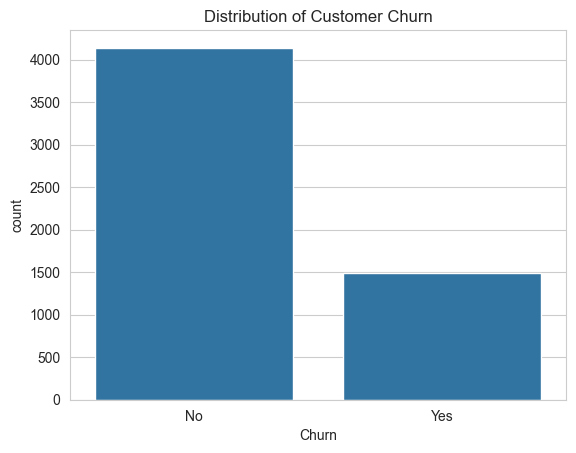

In [110]:
print(df['Churn'].value_counts(normalize=True)*100)

sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

### INFRENCES
###### (Note -: the churn rate is the percentage of customers that leave within a given amount of time.)
* Acc to the count plot above we can see that the amount of Customers leaving the telecom industry is way less then the amount of Customers deciding to stay with the industry(Retention rate)
* Approx 73% of customers are deciding to stay with the Company (did not churn)
* Approx 26% of customers have churned and decided to switch to another competitor
##### * Overall we can say that from this data and graph it is clear that Retention Rate is higher then Churning Rate
##### Retention Rate >> Churning Rate

#### Converting 'TotalCharges' from object Datatype to float Datatype

In [111]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors="coerce")
print(df['TotalCharges'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5634 entries, 0 to 5633
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
5626 non-null   float64
dtypes: float64(1)
memory usage: 44.1 KB
None


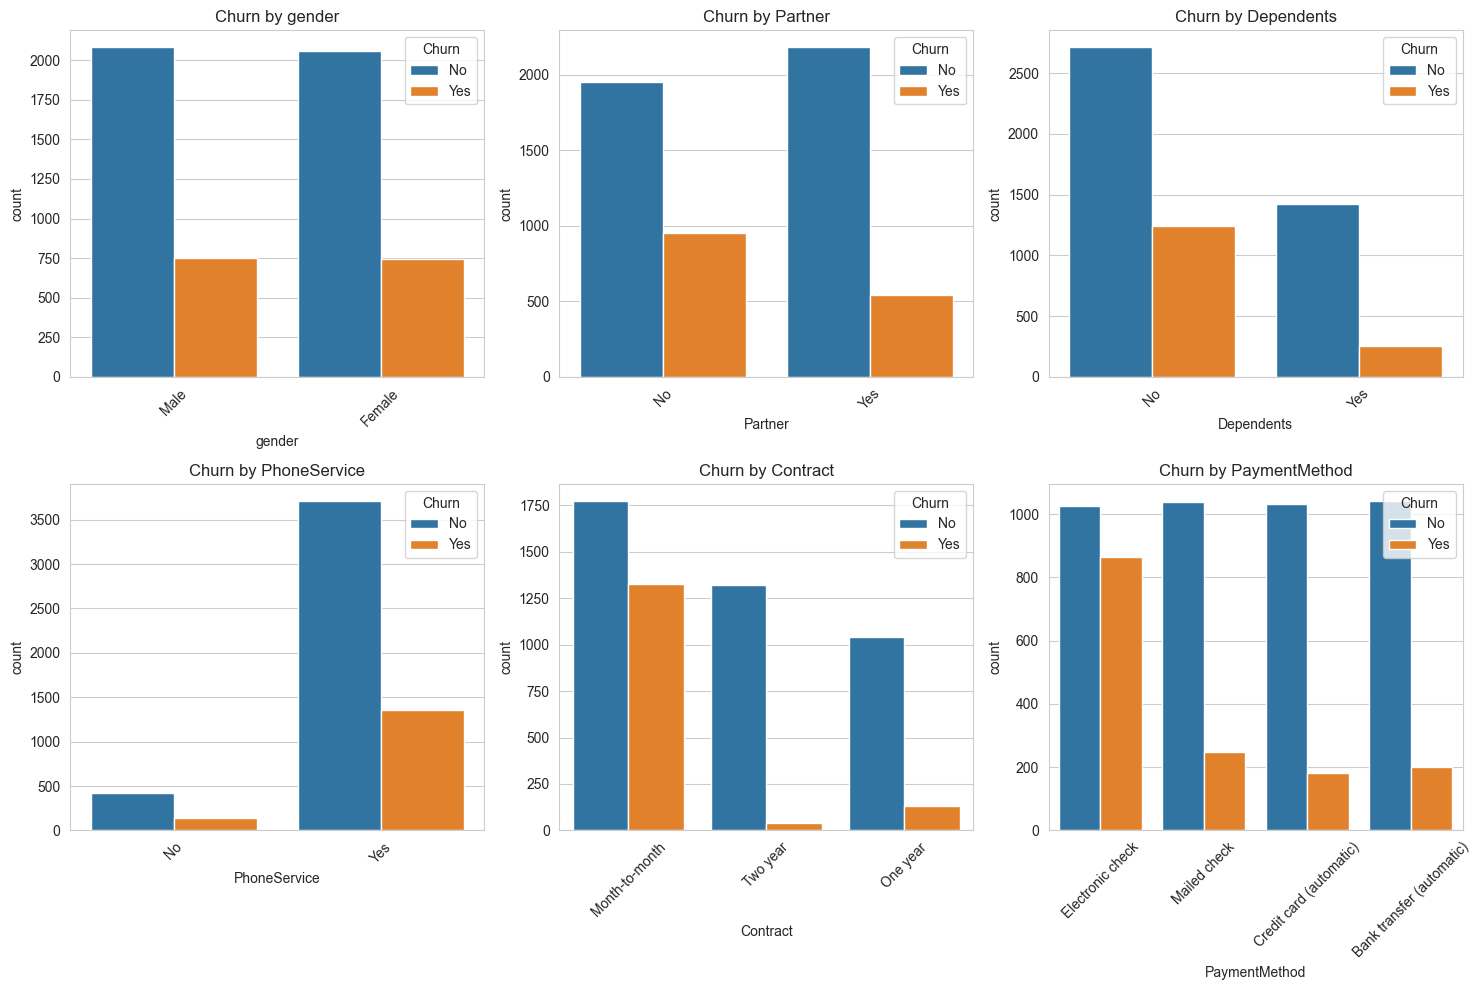

In [112]:
# Features to analyze
cat_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'Contract', 'PaymentMethod']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### KEY INFRENCES
#### 1) Contract Type is the BIGGEST Churn Indicator
* This is the most important finding. Customers on a Month-to-month contract churn at an extremely high rate. In contrast, those with One year or Two year contracts are far more loyal. This makes sense—longer commitments leads to better retention.

#### 2) Personal Life Matters (Partners & Dependents)
* No Partner, Higher Churn: Customers without a partner are significantly more likely to churn than those who have one.

* No Dependents, Higher Churn: This is even more dramatic. Customers without dependents churn at a much higher rate. Having dependents is a strong indicator of stability and loyalty.

#### 3) Payment Method Reveals Risk
* Customers who pay by Electronic check have a noticeably higher churn rate than all other payment methods. Automatic payment methods (like credit card or bank transfer) are associated with much lower churn, likely because they are more convenient and indicate a more stable customer relationship.

#### 4) Gender and Phone Service are NOT Strong Predictors
* Gender: The churn rate is almost identical for both males and females. This feature probably won't be very useful for our model.

* Phone Service: The vast majority of customers have phone service, and the churn rate within that group is proportional. This feature doesn't seem to be a major factor.

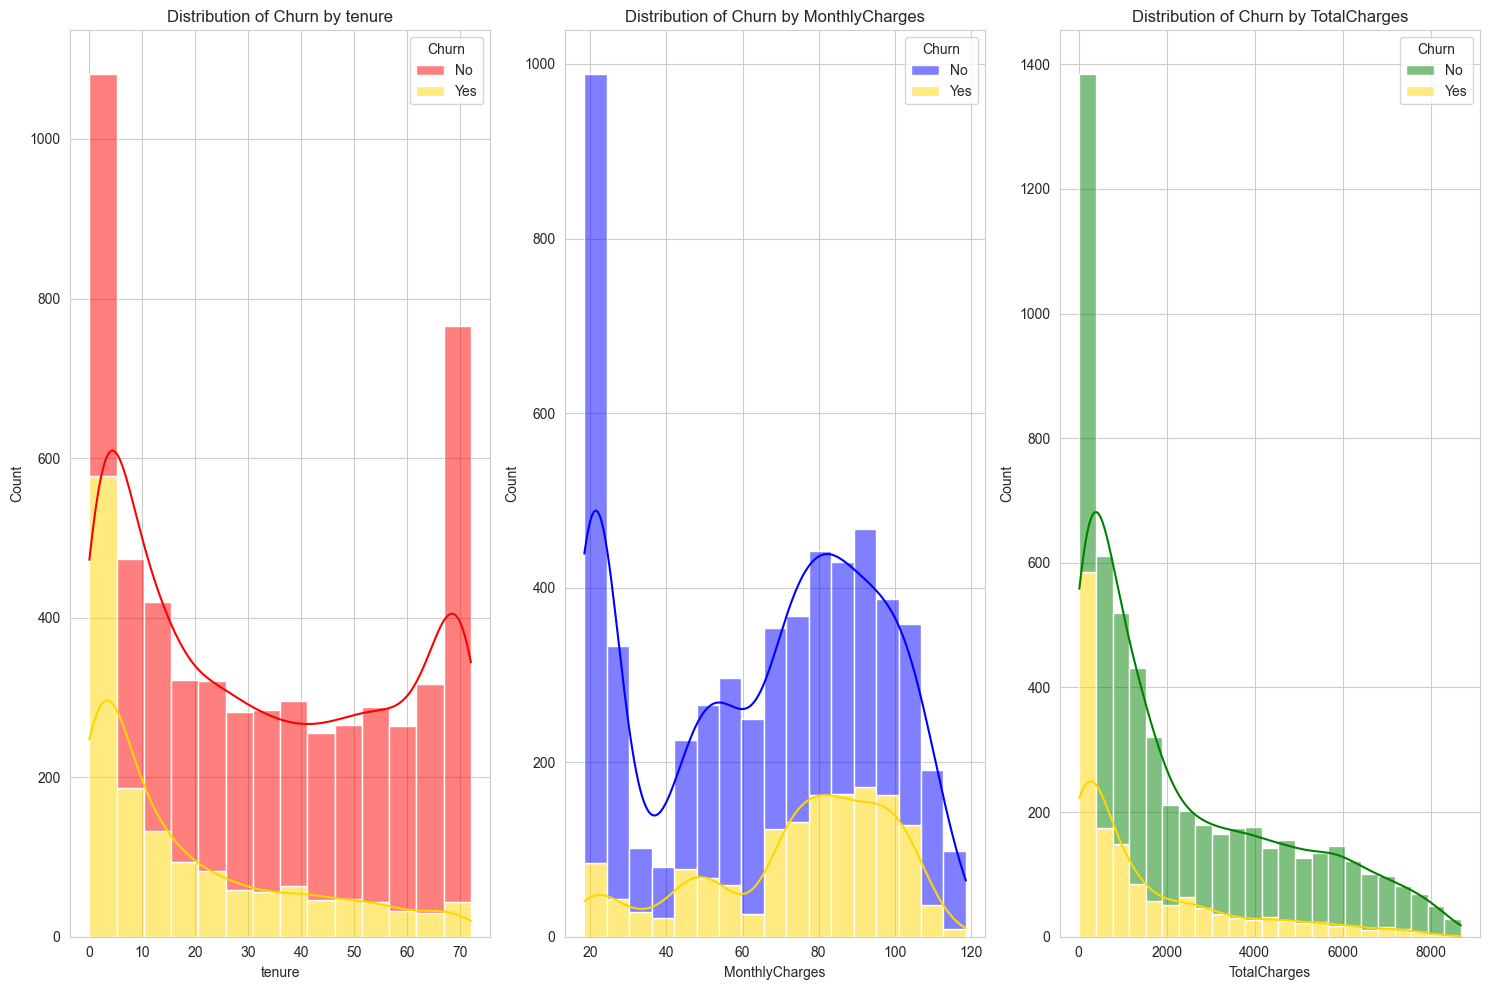

In [124]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
colors = {'tenure':"red",'MonthlyCharges':"blue",'TotalCharges':"green"}
plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    color = colors[col]
    sns.histplot(data=df,x=col,hue="Churn",kde=True, multiple="stack",palette=[color, 'gold'])
    plt.title(f'Distribution of Churn by {col}')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### KEY INFRENCES
#### 1) Tenure (Left Plot - Red/Yellow)
* High Churn at Low Tenure: There is a massive peak in the number of churned customers (Yellow bars) among those with very low tenure (0-5 months). This suggests that customers often decide to leave very early in their contract or service period.

* Low Churn for Long-Term Customers: Customers with a high tenure (around 60-72 months) have a significantly lower proportion of churn (Yellow) relative to non-churn (Red). This indicates that loyalty increases with the length of service.

#### 2) Monthly Charges (Middle Plot - Blue/Yellow)
* High Churn at High Charges: The proportion of churned customers (Yellow) is notably higher among customers with high Monthly Charges (approximately $$$80 to $$$110).

* Low Churn at Low Charges: Customers with very low monthly charges (e.g., $$$20 or less) have a much smaller proportion of churn. These are likely customers with basic, low-cost plans.

#### 3) Total Charges (Right Plot - Green/Yellow)
* High Churn at Low Total Charges: The majority of churned customers (Yellow) are concentrated at the low end of the Total Charges (close to $$$0). This aligns perfectly with the Tenure observation: customers who churned early haven't accumulated high total charges yet.

* Low Churn at High Total Charges: As Total Charges increase, the total number of customers drops, but the proportion of churn (Yellow) becomes very small. This confirms that customers who have been with the company long enough to accumulate high total charges are very unlikely to leave.